In [1]:
#Importing the required libraries
from fastai.tabular.all import * 
pd.options.display.max_columns = 50

In [2]:
#Loading and looking at training data
train_df = pd.read_csv("../input/tabular-playground-series-may-2022/train.csv")
train_df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,3,3,3,1,6,1,0,7,4,0.298218,-0.919717,3.058541,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,0,2,3,0,1,0,4,6,0,-3.147667,-1.075434,2.179050,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,6,6,4,3,1,2,2,1,4,2.820733,-3.485342,-0.784235,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,0,1,6,4,2,3,3,0,3,1.081084,-2.100177,-2.343819,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,4,3,0,6,0,3,3,1,0,-0.126179,0.605033,1.133665,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [3]:
#Loading and looking at test data
test_df = pd.read_csv("../input/tabular-playground-series-may-2022/test.csv")
test_df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,0,0,0,5,1,1,2,2,0,1,-1.128371,2.749347,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,4,0,2,1,3,0,0,0,2,0,-4.424098,1.080762,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,4,1,1,3,2,2,4,1,0,3,-1.523864,-1.406712,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,4,2,1,5,0,3,3,1,4,2,-1.404597,3.011085,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,2,0,0,3,0,1,2,0,2,2,-1.968516,0.100594,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


## Data Exploration

In [4]:
#Understand the data by looking into shape
train_df.shape, test_df.shape

((900000, 33), (700000, 32))

In [5]:
#Checking is there any null value in the training data
train_df.isna().sum()

id        0
f_00      0
f_01      0
f_02      0
f_03      0
f_04      0
f_05      0
f_06      0
f_07      0
f_08      0
f_09      0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
target    0
dtype: int64

In [6]:
#understand how the data is distributed(T represent transpose which is helps to visualize better)
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,900000.0,449999.500000,259807.765473,0.000000,224999.750000,449999.500000,674999.250000,899999.000000
f_00,900000.0,-0.000286,0.998888,-4.599856,-0.675490,0.001144,0.674337,4.749301
f_01,900000.0,0.001165,0.999193,-4.682199,-0.675162,0.002014,0.675021,4.815699
f_02,900000.0,0.001174,1.000514,-4.642676,-0.674369,0.002218,0.677505,4.961982
f_03,900000.0,-0.001368,1.000175,-4.658816,-0.676114,-0.002227,0.672544,4.454920
f_04,900000.0,-0.000571,1.000167,-4.748501,-0.675909,-0.001662,0.673789,4.948983
f_05,900000.0,0.000284,0.999875,-4.750214,-0.673437,-0.000438,0.675028,4.971881
f_06,900000.0,-0.000709,0.999942,-4.842919,-0.674876,-0.001492,0.674749,4.822668
f_07,900000.0,2.031460,1.656172,0.000000,1.000000,2.000000,3.000000,15.000000
f_08,900000.0,2.057998,1.590955,0.000000,1.000000,2.000000,3.000000,16.000000


In [7]:
#Let's understand relation between the data
corr = train_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
id,1.000000,-0.000269,0.000578,0.000084,0.000937,0.000859,0.001505,0.001458,-0.000475,0.000116,0.000972,0.001703,0.000695,-0.000624,-0.000474,0.000272,0.001866,0.000977,-0.001190,0.000374,-0.001004,0.001764,-0.000321,-0.000675,-0.000493,-0.001231,-0.000186,0.001465,0.002092,0.000768,0.000030,0.000184
f_00,-0.000269,1.000000,-0.000303,0.001899,-0.000841,-0.000544,0.000305,-0.001312,0.000831,-0.002553,0.000078,0.000627,0.001131,-0.000196,0.000586,0.001111,-0.001298,-0.000544,0.000199,-0.001019,0.000372,-0.000023,0.001069,-0.001079,0.000269,0.001895,0.000509,0.000117,0.189369,0.000274,-0.000996,0.055274
f_01,0.000578,-0.000303,1.000000,0.000501,-0.000833,-0.000832,0.000636,-0.000441,-0.001220,-0.000292,-0.000566,0.001240,0.001565,-0.001031,-0.000512,0.000292,-0.000508,-0.001192,0.000007,0.000341,-0.000877,0.001204,-0.001635,-0.000462,-0.000646,-0.000970,-0.000115,0.002033,0.193940,-0.000556,-0.000070,0.055011
f_02,0.000084,0.001899,0.000501,1.000000,0.000792,0.000067,-0.001109,0.000894,0.001206,0.000339,0.001718,0.001146,-0.001822,0.001916,-0.002856,0.000251,0.000395,-0.001464,0.000896,-0.000535,-0.001172,0.000918,-0.000215,-0.000319,-0.000018,-0.000003,-0.000894,0.000574,0.209182,-0.001451,-0.000023,0.031814
f_03,0.000937,-0.000841,-0.000833,0.000792,1.000000,0.001049,0.002768,-0.001092,0.001114,-0.000124,0.000484,-0.000240,0.002122,0.001023,-0.001552,-0.000281,-0.002340,-0.000069,0.001437,0.001515,0.001420,0.000853,-0.000082,0.000503,0.001413,0.002854,0.001784,0.000713,0.328895,-0.000624,0.000239,-0.000192
f_04,0.000859,-0.000544,-0.000832,0.000067,0.001049,1.000000,0.000194,-0.000312,0.001227,-0.000251,0.002478,-0.003559,0.000270,0.001543,-0.001316,0.001035,0.000802,-0.000947,-0.000232,0.000427,0.000606,0.000405,0.000366,0.001751,-0.002201,0.000601,-0.001981,-0.000520,0.170484,-0.001122,0.000475,0.000159
f_05,0.001505,0.000305,0.000636,-0.001109,0.002768,0.000194,1.000000,0.000233,0.000407,-0.000421,-0.000335,-0.000715,-0.001091,0.003310,0.001439,0.000379,-0.000613,-0.000147,0.000503,0.000128,-0.000606,-0.000029,0.000738,0.001341,-0.000474,-0.001733,0.001316,0.001218,0.295899,-0.001412,-0.000684,0.033048
f_06,0.001458,-0.001312,-0.000441,0.000894,-0.001092,-0.000312,0.000233,1.000000,-0.000878,-0.000635,-0.000908,-0.000312,0.000835,0.001598,-0.000122,-0.000900,-0.000906,0.001000,0.000420,-0.001205,0.001098,-0.000869,-0.000274,-0.000150,0.000234,-0.002099,0.000670,0.000021,0.164806,0.000706,0.000724,-0.000965
f_07,-0.000475,0.000831,-0.001220,0.001206,0.001114,0.001227,0.000407,-0.000878,1.000000,0.112707,0.006641,-0.088858,-0.135343,0.094462,0.059826,-0.061397,0.055947,0.062147,-0.149931,0.026984,-0.003235,-0.003595,0.001220,-0.000519,0.004241,0.001596,-0.000839,-0.003759,0.000977,-0.048163,0.000169,0.005257
f_08,0.000116,-0.002553,-0.000292,0.000339,-0.000124,-0.000251,-0.000421,-0.000635,0.112707,1.000000,-0.066704,-0.085745,-0.103141,0.011905,0.039174,-0.043501,0.010702,0.049713,-0.050146,0.065304,-0.005383,-0.004854,0.003471,-0.001516,0.002835,0.003349,-0.001623,-0.002668,-0.000204,0.064927,0.000336,0.035829


In [8]:
#Getting information of training data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

## Data preprocessing/Feature Engineering

In [9]:
#By looking into data f_27 is the only column which is not continous(Non-numeric)
string_var = 'f_27'

In [10]:
#Converting the column into 10 seperate coloumn to understand the relationship
def feature_27(df, do_convert = True):
    if do_convert:
        for i in range(10):
            df[f'f_27_{i}'] = df[string_var].str.get(i)
    df.drop([string_var], axis=1, inplace=True)
    return df

In [11]:
#Applying the above function into traing and test data
train_df = feature_27(train_df, do_convert=True)
test_df = feature_27(test_df, do_convert=True)

In [12]:
#After applying the data function, just checking the shape of the data
train_df.shape, test_df.shape

((900000, 42), (700000, 41))

In [13]:
#Looking the feature engineered data
train_df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target,f_27_0,f_27_1,f_27_2,f_27_3,f_27_4,f_27_5,f_27_6,f_27_7,f_27_8,f_27_9
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,3,3,3,1,6,1,0,7,4,0.298218,-0.919717,3.058541,-2.540739,0.766952,-2.730628,-0.208177,1.363402,67.609153,0,0,0,A,B,A,B,D,A,D,B,A,B
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,0,2,3,0,1,0,4,6,0,-3.147667,-1.075434,2.179050,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,377.096415,0,0,1,A,C,A,C,C,A,D,C,E,B
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,6,6,4,3,1,2,2,1,4,2.820733,-3.485342,-0.784235,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,-195.599702,0,2,1,A,A,A,E,A,B,C,K,A,D
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,0,1,6,4,2,3,3,0,3,1.081084,-2.100177,-2.343819,0.572594,-1.653213,1.686035,-2.533098,-0.608601,210.826205,0,0,1,B,D,B,B,A,A,C,B,C,B
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,4,3,0,6,0,3,3,1,0,-0.126179,0.605033,1.133665,-3.912929,-1.430366,2.127649,-3.306784,4.371371,-217.211798,0,1,1,B,D,B,C,B,B,C,H,F,E


In [14]:
#Splitting the data into categorical and continous
cont_names = [col for col in train_df if train_df[col].dtype =="float64"]
cat_names = [col for col in train_df if train_df[col].dtype !="float64"]
cont_names

['f_00',
 'f_01',
 'f_02',
 'f_03',
 'f_04',
 'f_05',
 'f_06',
 'f_19',
 'f_20',
 'f_21',
 'f_22',
 'f_23',
 'f_24',
 'f_25',
 'f_26',
 'f_28']

In [15]:
cat_names

['id',
 'f_07',
 'f_08',
 'f_09',
 'f_10',
 'f_11',
 'f_12',
 'f_13',
 'f_14',
 'f_15',
 'f_16',
 'f_17',
 'f_18',
 'f_29',
 'f_30',
 'target',
 'f_27_0',
 'f_27_1',
 'f_27_2',
 'f_27_3',
 'f_27_4',
 'f_27_5',
 'f_27_6',
 'f_27_7',
 'f_27_8',
 'f_27_9']

In [16]:
#Removing the id column which is unique number, not going to help our prediction and removing target for predictions.
cat_names.remove("target")
cat_names.remove("id")

In [17]:
#Splitting the data randomly for traing and validation
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))

In [18]:
#Looking into data how it splits
splits

((#720000) [230751,253680,82412,159780,207126,609032,267758,124509,391608,688606...],
 (#180000) [435664,300798,352639,417330,383845,76520,707531,165332,247500,682465...])

## Preprocessing

In [19]:
#Building a datablock for the model
to = TabularPandas(train_df,
                   procs = [Categorify,Normalize],
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names='target',
                   y_block = CategoryBlock,
                   splits=splits)

In [20]:
#looking to training dataset
to.xs.iloc[:2]

,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_29,f_30,f_27_0,f_27_1,f_27_2,f_27_3,f_27_4,f_27_5,f_27_6,f_27_7,f_27_8,f_27_9,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28
230751,8,3,3,2,2,5,2,4,8,1,1,2,1,3,2,3,2,1,3,1,2,2,2,4,-1.217480,-0.331523,-0.662526,-1.420178,0.977738,0.718553,0.441792,0.945131,-0.705252,-0.494678,0.795898,-0.919247,-1.645736,0.025487,-0.710482,-1.484303
253680,5,3,4,2,1,6,2,1,2,4,3,5,1,2,2,1,1,1,2,1,3,12,4,2,2.807992,-0.737023,1.287877,-0.620150,-0.961979,-0.886049,1.645913,1.522711,0.468524,0.371546,-0.285190,0.365066,-0.318622,-0.875335,-0.670588,-0.597858


In [21]:
#checking the shape
to.xs.shape,train_df.shape

((900000, 40), (900000, 42))

In [22]:
#Loading the data batch size of 2048
dls = to.dataloaders(bs=2048)

In [23]:
#Looking the data loaders
dls.show_batch()

,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_29,f_30,f_27_0,f_27_1,f_27_2,f_27_3,f_27_4,f_27_5,f_27_6,f_27_7,f_27_8,f_27_9,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,target
0,1,3,1,6,2,2,2,0,1,3,4,5,0,1,A,C,A,F,A,B,D,J,A,K,0.468140,-1.130199,1.361572,0.990447,0.342994,-0.388933,0.047889,0.230441,4.019375,4.388500,-0.004315,-2.080703,0.448585,1.606923,1.175486,138.206087,1
1,0,1,5,1,3,4,2,0,2,4,4,2,0,1,A,C,B,A,A,A,F,Q,D,B,1.070888,-0.959332,0.183058,-0.139667,-0.764754,-0.204192,-1.695352,1.108464,-1.009669,2.317603,0.332386,2.042111,-5.136886,4.488958,-2.041000,223.249639,0
2,1,4,3,3,1,5,3,4,1,4,1,0,1,2,B,F,B,A,B,B,B,E,A,C,0.986764,-0.308639,0.696898,-0.299449,1.955056,0.401727,-0.453182,0.962224,-1.943190,-1.791955,3.676998,-1.271319,-1.921833,2.426229,4.239980,167.168646,0
3,1,1,7,1,5,3,3,1,0,0,2,3,1,2,B,B,B,C,C,A,D,O,C,B,-0.334905,-0.031456,1.248606,-2.126832,-1.724914,1.420760,1.102844,0.484740,1.869453,-1.720438,1.354855,-1.089353,-2.529421,-1.707297,-2.058018,173.712339,0
4,4,3,2,2,1,2,4,0,3,3,2,6,1,2,A,C,B,C,A,A,E,J,E,C,0.249369,-0.206249,0.957549,0.840910,-1.138770,0.423035,-0.074394,4.110297,5.409653,-1.242161,-2.667066,0.784614,0.235409,-0.185712,-0.610554,-17.717445,1
5,3,1,2,0,2,3,6,0,2,0,6,3,0,1,A,A,B,A,A,A,D,A,C,D,-0.245633,0.135214,0.648541,-0.823020,0.018003,1.226391,0.374675,1.708407,2.601236,7.495251,-1.034938,0.651271,1.583641,-1.861346,-0.387586,-76.546585,1
6,1,1,0,1,1,2,3,2,2,3,2,2,0,2,B,C,B,C,C,B,B,T,B,C,1.222470,-0.682110,0.599045,-0.581727,-0.815650,-0.580492,-0.995941,-0.144208,0.309611,-3.351993,-0.005900,-0.976574,-2.231420,4.261243,-0.654076,-29.466230,0
7,0,5,3,2,1,3,1,1,4,1,2,4,1,0,A,A,B,B,B,B,D,S,D,B,-0.792346,1.569762,0.100467,1.279028,-0.205824,0.865331,1.433543,-0.210502,1.109874,4.689387,-5.433271,-0.182845,-0.039606,0.936762,4.910054,453.016579,1
8,1,1,0,2,1,2,0,1,2,3,0,1,0,0,B,D,B,E,A,B,D,L,C,D,0.889290,0.138637,0.830246,-0.564796,0.288468,0.025143,-0.041983,-0.657907,0.053098,0.804677,-3.543249,2.197493,-3.302789,-5.362691,-1.494545,286.901019,0
9,2,2,0,5,2,4,2,0,1,2,2,1,0,1,A,C,B,G,A,B,C,G,F,A,0.471876,0.238195,-1.728867,-0.608743,-1.348817,-0.563672,-1.243399,-0.081325,0.118165,1.068707,-2.023293,0.612033,-0.933446,2.136271,1.630382,-445.471519,0


In [24]:
#Building the tabular learner
learn = tabular_learner(dls, 
                        metrics=accuracy, 
                        layers = [512,256,128,128,64], 
                        wd=0.1)

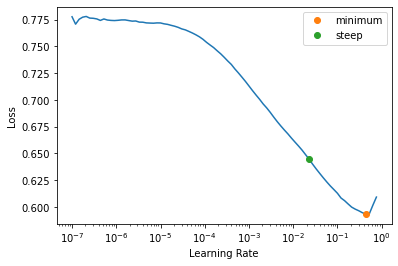

In [25]:
#Finding the learning rate
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [26]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 4.37e-02, steepest point: 2.29e-02


In [27]:
#Fitting the model
learn.fit_one_cycle(30, lr_steep)

epoch,train_loss,valid_loss,accuracy,time
0,0.298586,0.283981,0.886633,00:10
1,0.213879,0.209353,0.912600,00:10
2,0.201401,0.207477,0.912533,00:10
3,0.192043,0.189593,0.917139,00:10
4,0.168722,0.186465,0.924617,00:10
5,0.161002,0.164238,0.933606,00:11
6,0.158092,0.164322,0.932450,00:10
7,0.152719,0.158702,0.936617,00:10
8,0.146648,0.154353,0.937589,00:11
9,0.146898,0.151515,0.937828,00:10


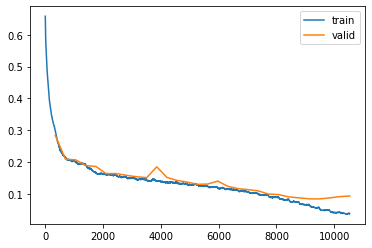

In [28]:
#Recorder plot how our  model is performing
learn.recorder.plot_loss()

In [29]:
#look into the result of learner
learn.show_results()

,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_29,f_30,f_27_0,f_27_1,f_27_2,f_27_3,f_27_4,f_27_5,f_27_6,f_27_7,f_27_8,f_27_9,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,target,target_pred
0,3.0,3.0,3.0,4.0,2.0,9.0,2.0,2.0,3.0,3.0,4.0,2.0,1.0,2.0,1.0,3.0,1.0,3.0,2.0,2.0,3.0,17.0,4.0,1.0,-0.172919,-0.327667,0.393381,0.304838,-0.297316,0.106236,0.749006,-1.218124,-0.526182,1.018397,-0.026356,0.118198,1.612954,0.168150,-0.492805,0.388754,0.0,1.0
1,3.0,4.0,4.0,4.0,3.0,3.0,2.0,3.0,3.0,4.0,4.0,6.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,1.0,3.0,14.0,1.0,3.0,0.857637,-0.334598,-0.263600,-0.762288,-0.639156,0.575811,1.947263,0.597082,-0.947475,-0.117645,-0.225016,-0.323819,-1.171791,0.523757,-0.540241,0.229234,0.0,0.0
2,2.0,1.0,4.0,2.0,1.0,3.0,3.0,1.0,5.0,1.0,1.0,4.0,1.0,3.0,1.0,3.0,2.0,1.0,2.0,1.0,2.0,9.0,1.0,5.0,-0.236288,-0.798205,0.862196,0.677967,0.033005,0.428991,-0.198349,-0.605608,0.418928,-0.216762,-0.991509,-0.305930,-1.683594,-1.112092,-1.743696,0.567219,1.0,1.0
3,4.0,3.0,2.0,4.0,6.0,4.0,2.0,1.0,5.0,2.0,3.0,5.0,2.0,2.0,1.0,5.0,2.0,3.0,1.0,2.0,2.0,13.0,2.0,2.0,-0.052563,-1.568575,0.713974,-1.122371,0.277068,2.583182,-0.509577,0.100376,1.615241,2.110868,-1.073462,1.914669,-0.003554,-1.614631,-1.327071,-0.140376,1.0,1.0
4,2.0,2.0,5.0,2.0,3.0,1.0,3.0,3.0,3.0,2.0,5.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,3.0,2.0,3.0,2.269463,0.733050,-0.115895,0.553544,0.144893,1.257313,0.057230,0.335604,-1.257370,1.187007,1.111205,0.473422,-0.078341,0.663820,0.858104,0.921663,0.0,0.0
5,2.0,3.0,4.0,1.0,1.0,4.0,4.0,1.0,4.0,5.0,3.0,5.0,1.0,1.0,2.0,3.0,2.0,1.0,1.0,2.0,5.0,4.0,4.0,3.0,0.894156,0.210736,-0.471531,0.100075,0.168657,-0.676817,0.171697,-2.258102,0.788314,2.198534,0.439888,1.436442,-0.099470,-0.126478,0.268121,1.126429,1.0,0.0
6,4.0,1.0,3.0,4.0,2.0,1.0,5.0,4.0,3.0,4.0,4.0,1.0,1.0,3.0,1.0,3.0,2.0,2.0,1.0,2.0,4.0,13.0,4.0,2.0,0.450991,-0.095084,-0.162267,0.506480,-1.469494,0.943486,-1.317818,1.617383,0.057728,0.735906,-1.202117,-0.982941,0.021791,-1.153079,1.109934,-1.057601,1.0,1.0
7,2.0,3.0,1.0,7.0,2.0,2.0,2.0,4.0,4.0,3.0,1.0,6.0,2.0,3.0,1.0,5.0,2.0,4.0,5.0,1.0,3.0,5.0,3.0,3.0,1.394071,-0.246402,-0.618048,-1.246703,-1.061202,-0.243182,-0.092009,1.510979,-1.887215,1.313825,0.210824,-0.434569,-1.537475,-0.812145,0.799352,-0.735275,0.0,0.0
8,3.0,2.0,2.0,2.0,3.0,3.0,6.0,3.0,3.0,2.0,1.0,4.0,2.0,1.0,2.0,4.0,2.0,2.0,3.0,1.0,5.0,16.0,2.0,3.0,0.518168,-0.050031,0.658785,0.668523,1.957943,0.220750,0.437562,0.703188,1.742697,1.913105,0.093160,-0.870184,0.674298,0.409846,-0.956272,0.561127,1.0,1.0


In [30]:
#To know the pipeline look into the summary
learn.summary()

TabularModel (Input shape: 2048 x 24)
Layer (type)         Output Shape         Param #    Trainable 
                     2048 x 8            
Embedding                                 136        True      
Embedding                                 136        True      
Embedding                                 128        True      
____________________________________________________________________________
                     2048 x 7            
Embedding                                 105        True      
Embedding                                 105        True      
____________________________________________________________________________
                     2048 x 8            
Embedding                                 136        True      
____________________________________________________________________________
                     2048 x 7            
Embedding                                 98         True      
Embedding                                 105      

In [31]:
#Lets'predict with a row of data
row, clas, probs = learn.predict(train_df.iloc[0])

In [32]:
#Lets see the row prediction
row.show()

,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_29,f_30,f_27_0,f_27_1,f_27_2,f_27_3,f_27_4,f_27_5,f_27_6,f_27_7,f_27_8,f_27_9,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,target
0,1,5,1,3,3,3,1,6,1,0,7,4,0,0,A,B,A,B,D,A,D,B,A,B,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,0.298218,-0.919717,3.058541,-2.540739,0.766952,-2.730628,-0.208177,1.363402,67.609151,0


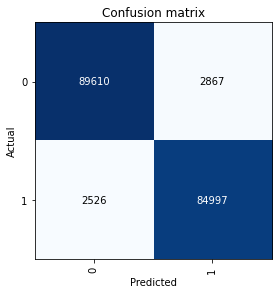

In [33]:
#Let's check how our model is predicting the classification
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [34]:
#Preparing the dataset for the prediction
test_df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,f_27_0,f_27_1,f_27_2,f_27_3,f_27_4,f_27_5,f_27_6,f_27_7,f_27_8,f_27_9
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,0,0,0,5,1,1,2,2,0,1,-1.128371,2.749347,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,99.478419,0,0,B,A,A,A,B,A,D,L,A,C
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,4,0,2,1,3,0,0,0,2,0,-4.424098,1.080762,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,-65.993825,1,0,A,F,A,B,B,A,E,G,C,B
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,4,1,1,3,2,2,4,1,0,3,-1.523864,-1.406712,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,-87.405622,0,1,B,B,A,C,A,B,B,K,E,E
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,4,2,1,5,0,3,3,1,4,2,-1.404597,3.011085,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,-281.293460,0,0,A,E,B,E,A,A,C,Q,C,C
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,2,0,0,3,0,1,2,0,2,2,-1.968516,0.100594,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,25.629415,0,2,A,E,B,B,B,B,D,A,B,F


In [35]:
#Droping the irrelevant column
test_df.drop("id", axis=1, inplace= True)

In [36]:
#Look into the test dataset
test_df

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,f_27_0,f_27_1,f_27_2,f_27_3,f_27_4,f_27_5,f_27_6,f_27_7,f_27_8,f_27_9
0,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,0,0,0,5,1,1,2,2,0,1,-1.128371,2.749347,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,99.478419,0,0,B,A,A,A,B,A,D,L,A,C
1,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,4,0,2,1,3,0,0,0,2,0,-4.424098,1.080762,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,-65.993825,1,0,A,F,A,B,B,A,E,G,C,B
2,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,4,1,1,3,2,2,4,1,0,3,-1.523864,-1.406712,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,-87.405622,0,1,B,B,A,C,A,B,B,K,E,E
3,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,4,2,1,5,0,3,3,1,4,2,-1.404597,3.011085,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,-281.293460,0,0,A,E,B,E,A,A,C,Q,C,C
4,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,2,0,0,3,0,1,2,0,2,2,-1.968516,0.100594,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,25.629415,0,2,A,E,B,B,B,B,D,A,B,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,0.640110,0.897808,-0.523956,1.563760,-0.092281,-0.610867,0.535426,0,1,6,2,5,3,4,2,2,3,0,2,0.765192,-2.185190,2.604048,1.122867,0.518110,1.243837,0.575111,0.076372,204.186539,0,0,B,C,B,C,E,B,H,M,C,D
699996,-0.191771,-0.035246,-0.118533,0.584750,2.126977,0.568659,-0.052663,4,3,4,2,0,2,3,2,2,3,3,0,-0.895073,-0.239552,3.029857,1.384682,-1.135740,2.982713,-1.511760,2.225218,-97.694591,0,2,B,A,A,B,C,A,D,Q,F,C
699997,-0.331704,-0.328845,-1.185503,1.022128,-0.483099,-0.107146,-0.968281,1,1,2,1,1,3,1,0,1,3,2,1,0.178079,-0.922626,4.021273,-1.845266,1.096011,-2.734508,-4.885955,-2.248739,130.622745,1,0,A,A,A,J,C,B,G,Q,B,A
699998,-2.031073,-1.238398,0.964699,-1.045950,0.906064,0.634301,-0.707474,5,1,1,3,0,2,4,2,4,6,0,0,4.043097,-3.079996,1.453864,-1.696606,1.018995,1.973697,-0.353068,-3.333449,-364.625148,0,0,B,C,B,B,C,A,B,N,D,E


In [37]:
#Applying learner to the test data
dl = learn.dls.test_dl(test_df)

In [38]:
#Look into to it
dl

In [39]:
#Predict the test dataframe
pred = learn.get_preds(dl=dl)

In [40]:
#Let's see how our prediction
pred

(tensor([[3.1195e-06, 1.0000e+00],
         [1.2769e-05, 9.9999e-01],
         [1.0000e+00, 5.2128e-07],
         ...,
         [9.9838e-01, 1.6210e-03],
         [9.9987e-01, 1.2621e-04],
         [9.9999e-01, 6.2540e-06]]),
 None)

In [41]:
#Converting to submission format
preds = learn.get_preds(dl=dl)[0].argmax(1).numpy()
preds[:5]

array([1, 1, 0, 0, 1])

In [42]:
#Understand the shape
preds.shape

(700000,)

In [43]:
#Look into the submission format
sample = pd.read_csv("../input/tabular-playground-series-may-2022/sample_submission.csv")
sample

,id,target
0,900000,0.5
1,900001,0.5
2,900002,0.5
3,900003,0.5
4,900004,0.5
...,...,...
699995,1599995,0.5
699996,1599996,0.5
699997,1599997,0.5
699998,1599998,0.5


In [44]:
sub = pd.DataFrame({'id':sample.id, 'target': preds})
sub.to_csv('submission.csv', index=False)
sub.head()

,id,target
0,900000,1
1,900001,1
2,900002,0
3,900003,0
4,900004,1


In [45]:
#Training and validation set for bagging and boosting algorithms
X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_valid, y_valid = to.valid.xs, to.valid.ys.values.ravel()

In [46]:
#Exploring the training and validation datasets

In [47]:
X_train

,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_29,f_30,f_27_0,f_27_1,f_27_2,f_27_3,f_27_4,f_27_5,f_27_6,f_27_7,f_27_8,f_27_9,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28
230751,8,3,3,2,2,5,2,4,8,1,1,2,1,3,2,3,2,1,3,1,2,2,2,4,-1.217480,-0.331523,-0.662526,-1.420178,0.977738,0.718553,0.441792,0.945131,-0.705252,-0.494678,0.795898,-0.919247,-1.645736,0.025487,-0.710482,-1.484303
253680,5,3,4,2,1,6,2,1,2,4,3,5,1,2,2,1,1,1,2,1,3,12,4,2,2.807992,-0.737023,1.287877,-0.620150,-0.961979,-0.886049,1.645913,1.522711,0.468524,0.371546,-0.285190,0.365066,-0.318622,-0.875335,-0.670588,-0.597858
82412,2,3,3,4,2,6,5,3,3,1,2,2,1,1,2,2,2,4,3,2,5,17,4,1,-0.285178,0.352106,-1.122429,1.041167,1.042890,1.856704,-1.716089,-1.856139,0.058650,-0.871574,0.246705,0.224871,0.782007,-0.770306,0.867746,0.661717
159780,3,1,3,5,3,8,4,1,2,4,3,2,2,1,2,3,2,3,1,2,4,9,1,2,0.063807,1.264754,1.000543,-0.548747,0.640078,-1.101408,0.857841,-1.652909,-0.231672,-0.330664,0.040555,1.197421,0.022112,-0.244457,-1.817706,-0.897372
207126,1,3,6,2,2,3,3,3,1,3,8,2,1,2,1,6,2,5,1,1,4,17,7,4,0.173547,-1.086883,-0.619064,-0.364746,0.784650,-0.033185,-1.327742,1.499091,-2.410006,0.043888,1.368199,1.225574,-1.946303,0.450015,-0.204552,-0.607740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626233,2,5,3,4,1,4,3,3,2,1,2,2,2,1,2,3,2,5,3,2,5,12,3,5,-0.089796,0.020875,-0.030940,0.106252,-1.442352,-0.813921,-2.258541,-1.942822,0.718726,1.087527,-0.816689,1.578546,-0.154336,-1.002226,-0.837208,-1.471916
498811,3,4,1,4,2,5,3,2,1,3,1,3,2,2,2,5,1,4,4,1,5,6,2,1,-1.066507,-0.718952,0.512873,0.724419,-0.351906,0.682339,0.928281,1.821016,0.099039,-0.112669,-2.609900,0.228865,-0.330539,-1.154662,0.737329,1.152501
479706,3,3,2,3,3,8,5,2,3,3,3,1,1,2,1,3,1,4,2,2,6,15,3,2,-0.250590,-0.316153,1.219147,0.641539,-0.735946,1.457405,0.465000,0.123587,-1.049935,0.571873,0.105580,0.623428,0.557620,-0.218734,-1.641744,-0.957159
546943,2,2,5,1,1,6,2,3,1,2,3,2,1,2,1,5,1,1,1,1,3,15,5,3,-0.518459,-1.938558,-0.711408,1.193500,-0.604925,0.877676,-0.065951,2.293082,-0.106920,0.096348,0.743640,-0.342324,-0.035601,1.247669,0.305299,-0.411174


In [48]:
y_train

array([1, 0, 0, ..., 1, 1, 0], dtype=int8)

In [49]:
X_valid

,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_29,f_30,f_27_0,f_27_1,f_27_2,f_27_3,f_27_4,f_27_5,f_27_6,f_27_7,f_27_8,f_27_9,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28
435664,3,4,5,2,4,2,1,4,2,4,3,3,1,2,2,2,2,2,6,2,3,15,2,2,-0.776045,1.035328,-0.178096,-0.383702,1.391035,1.159666,-1.139688,1.480124,0.810490,0.134531,1.371502,-0.253128,-1.393455,1.413577,-1.973443,0.340106
300798,5,5,6,3,1,1,3,5,3,7,1,1,1,1,2,1,2,5,1,2,1,11,5,5,-1.014252,-1.151868,-0.239919,1.556547,-0.834446,0.056136,0.465499,-1.174347,-0.299841,0.183208,-0.321755,0.823783,0.672392,-0.678438,-0.667585,0.634501
352639,2,3,6,5,3,6,2,4,3,2,3,3,1,3,2,1,2,3,3,2,5,9,3,4,0.793221,-0.312670,1.023667,-0.656089,0.577518,-0.163844,-0.304408,-0.939412,-1.277763,-0.737749,0.692917,0.975052,-0.160480,0.756414,-0.175650,-0.237640
417330,2,2,4,6,1,5,3,2,2,4,2,2,1,3,2,2,1,3,1,2,6,1,2,1,-1.170226,0.092871,-0.100606,-1.003345,-2.287493,-0.102406,0.113985,1.297011,2.114822,-0.107117,-0.581118,1.016051,-1.388379,-0.298727,-1.941902,-1.672972
383845,4,2,2,3,2,4,2,2,4,2,3,3,1,3,2,4,2,3,1,1,2,8,2,1,-1.705148,-0.843771,-0.025413,-0.184272,1.263424,0.877388,-1.950172,0.842214,0.172337,-1.538959,0.431041,0.533798,0.929786,-0.086104,-0.102971,-0.165808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50247,1,2,3,3,1,4,4,4,2,3,2,3,1,3,1,3,2,2,1,1,6,2,2,6,-0.000843,-0.734065,-0.534166,0.463135,0.260270,-0.655165,-0.829026,0.110309,1.344588,-0.398803,0.708053,0.096935,2.364928,-0.085106,-0.745522,-0.008461
493790,6,4,6,3,1,6,1,4,3,5,1,2,1,2,2,2,1,1,5,1,5,20,1,2,-0.492920,0.420635,-0.027805,-1.825492,-0.341774,-0.511196,-1.248669,1.841215,-2.057397,-0.669516,1.073311,-1.082731,0.169949,-0.016613,0.297973,-1.889310
241703,2,2,2,4,3,6,7,1,5,2,2,1,1,3,1,6,1,6,6,2,5,10,3,3,-0.593457,-0.504200,-2.125366,0.045638,0.567635,-0.734195,0.562852,0.141714,-2.062662,-0.326522,0.514935,1.664530,-2.057549,-0.529550,-0.371153,-0.882529
828406,5,4,6,3,1,8,3,1,3,3,1,2,1,1,2,1,1,1,3,1,1,15,3,5,0.496232,0.824054,0.323213,0.103998,0.194446,0.887254,0.469904,-0.087971,1.282350,-0.257284,-0.268963,1.562994,0.855977,-0.034319,-1.279356,1.702244


In [50]:
y_valid

array([1, 0, 0, ..., 0, 1, 0], dtype=int8)

In [51]:
#understanding the shapes
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((720000, 40), (720000,), (180000, 40), (180000,))

In [52]:
%%time
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier().fit(X_train, y_train)

CPU times: user 32.3 s, sys: 251 ms, total: 32.6 s
Wall time: 32.8 s


In [53]:
clf.score(X_valid, y_valid)

0.8608833333333333

In [54]:
%%time
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier().fit(X_train, y_train)

CPU times: user 7min 31s, sys: 983 ms, total: 7min 32s
Wall time: 7min 33s


In [55]:
clf1.score(X_valid, y_valid)

0.8455555555555555

From understanding all the above model neural net perform better may be some hyperparameter tuning in the Boosting and Bagging model gives the high accuracy...Let's explore more in upcoming nextbook.